# 携帯電話価格帯分類のコンペの前情報

## 前処理

In [1]:
#必要なライブラリのインストール
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_filename = "../data/train.csv"
test_filename = "../data/test.csv"
#データの読み込み
train_df = pd.read_csv(train_filename) 
test_df= pd.read_csv(test_filename)

### 学習用データとテスト用データの確認


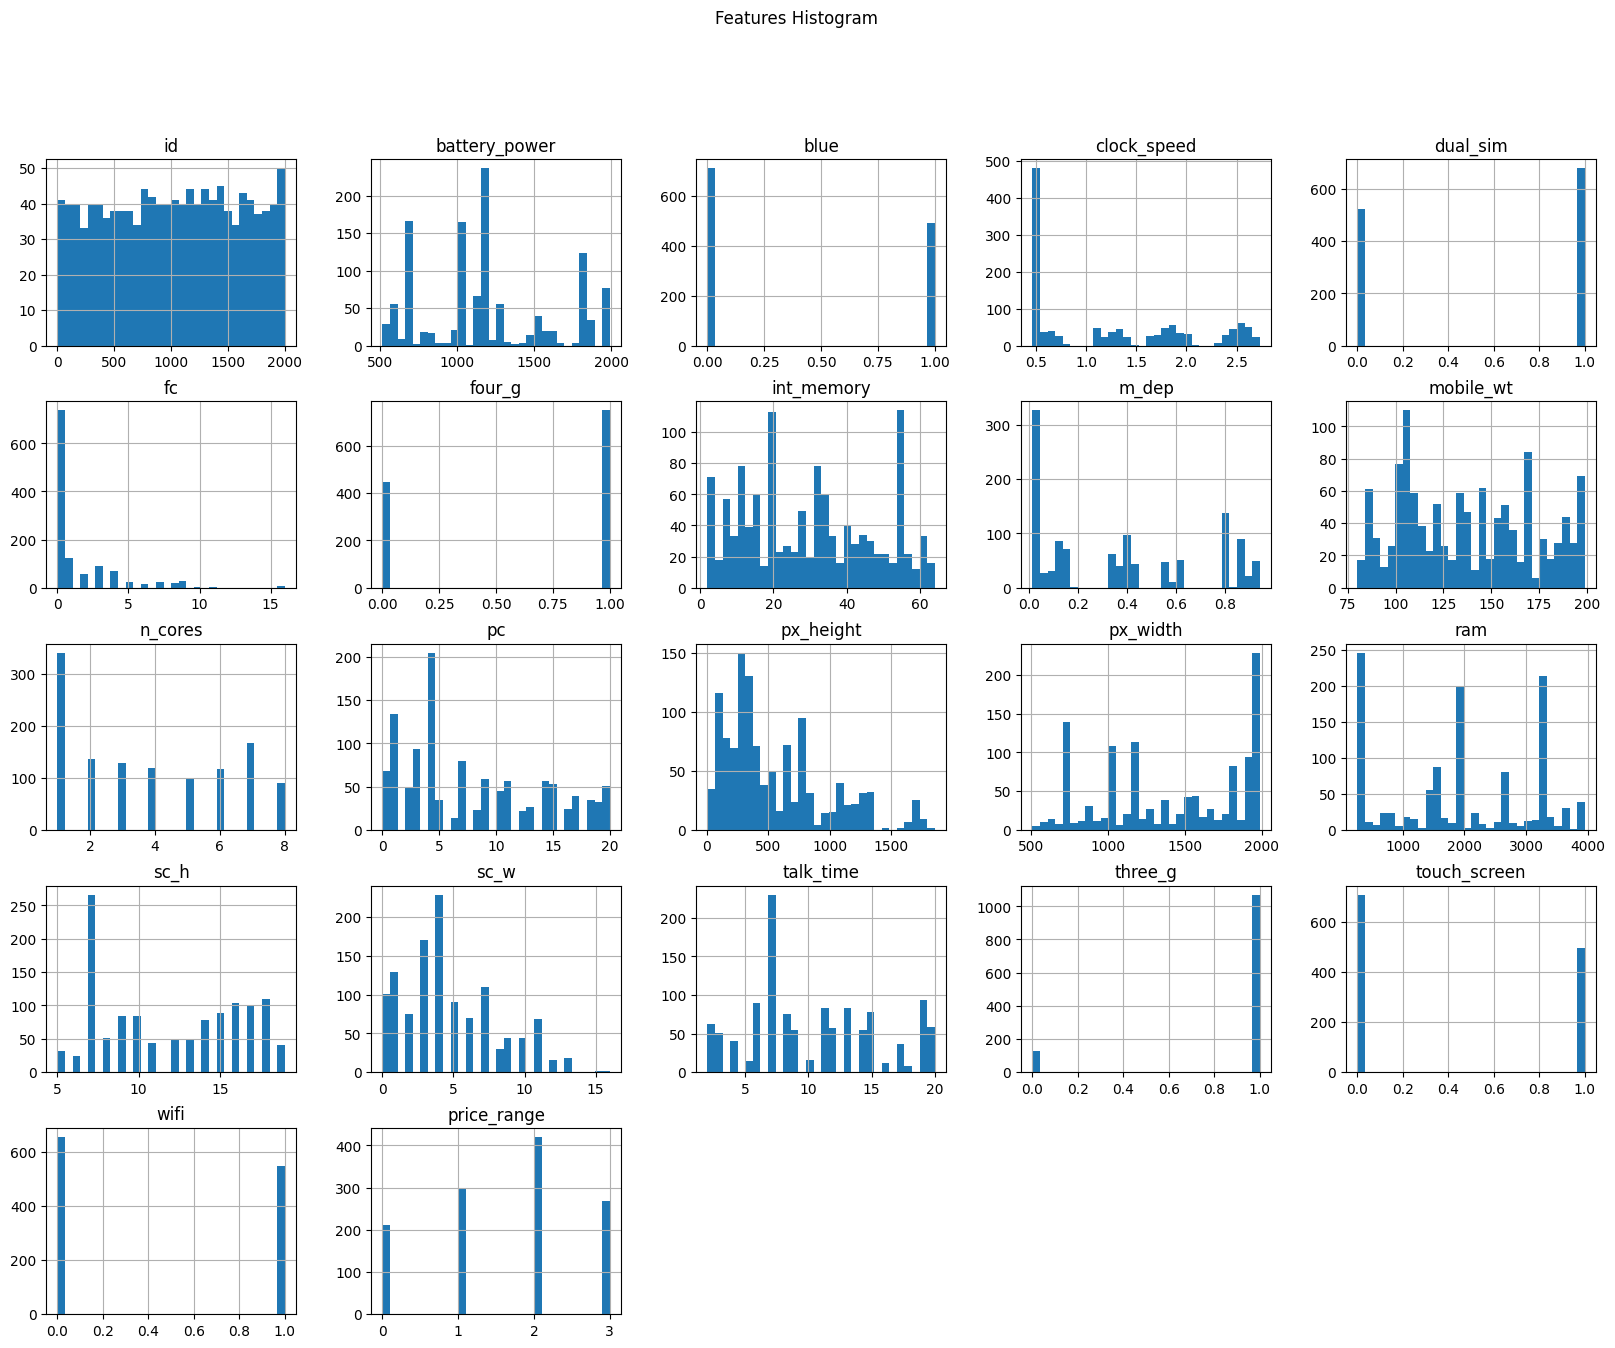

In [7]:
# 各列のヒストグラムを表示
train_df.hist(bins=30, figsize=(20, 15))
plt.suptitle('Features Histogram')
plt.show()

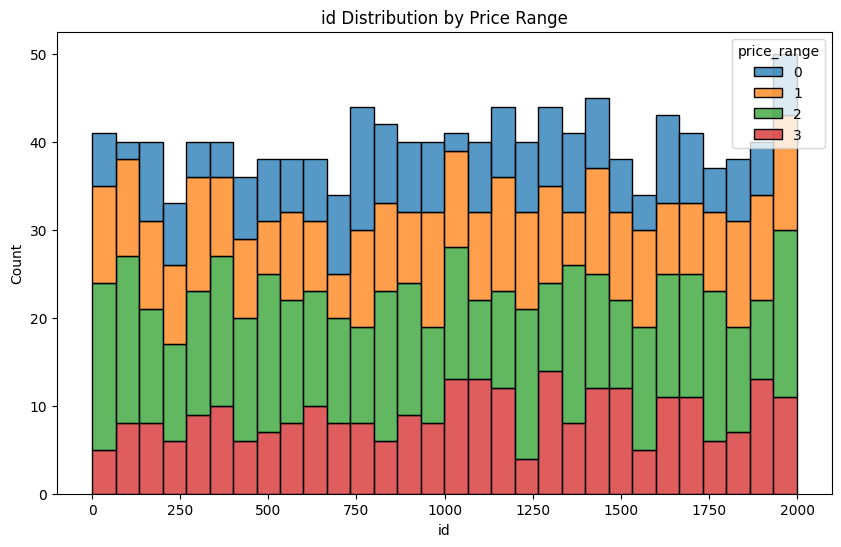

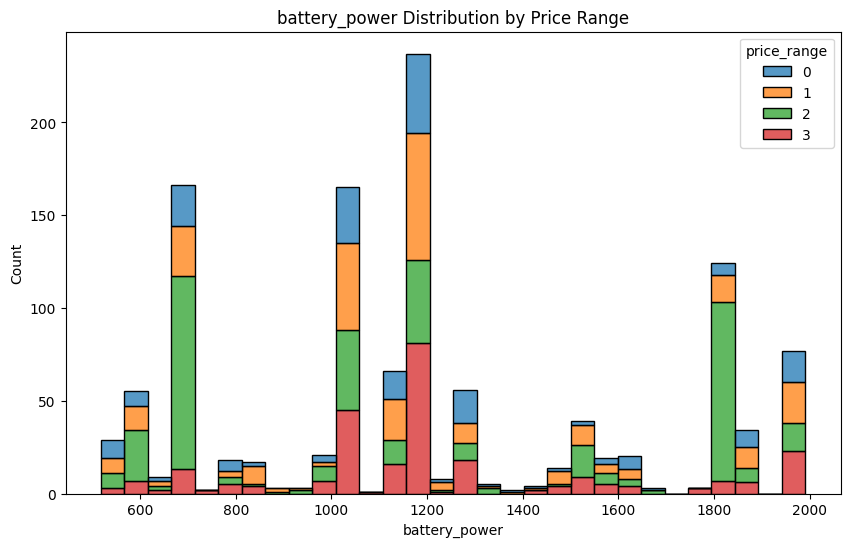

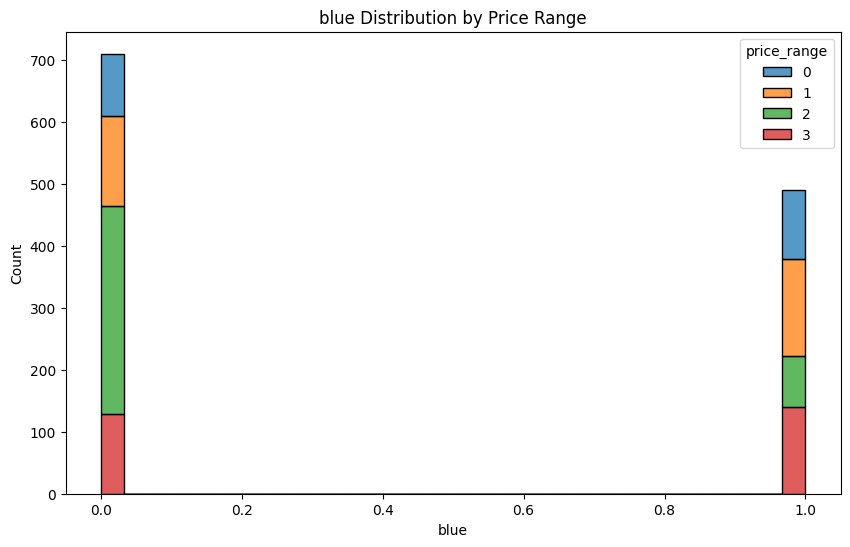

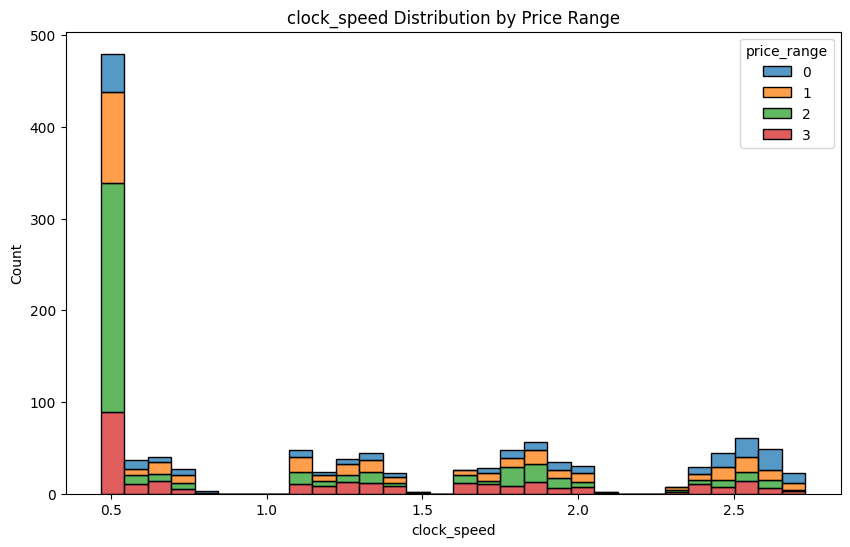

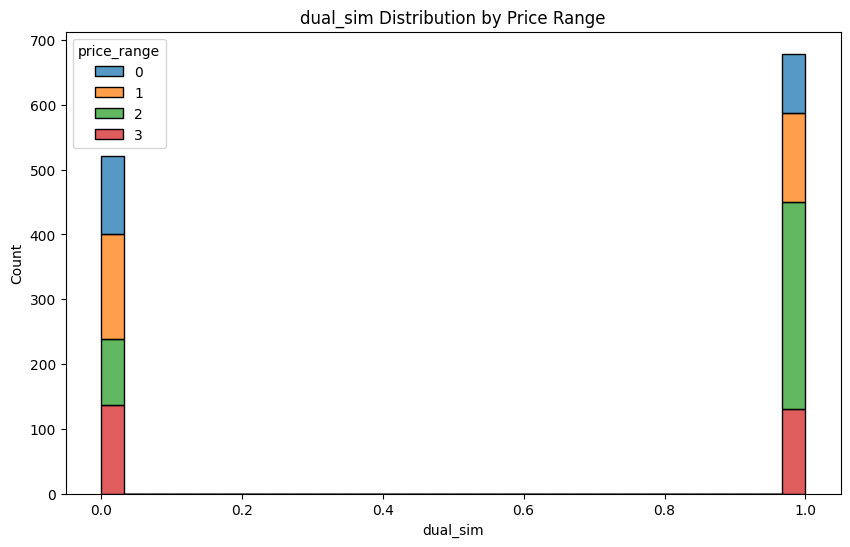

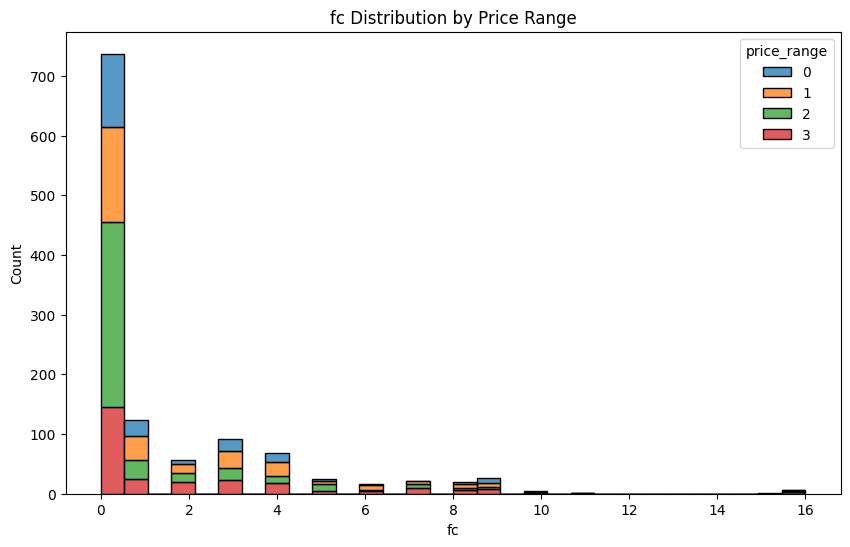

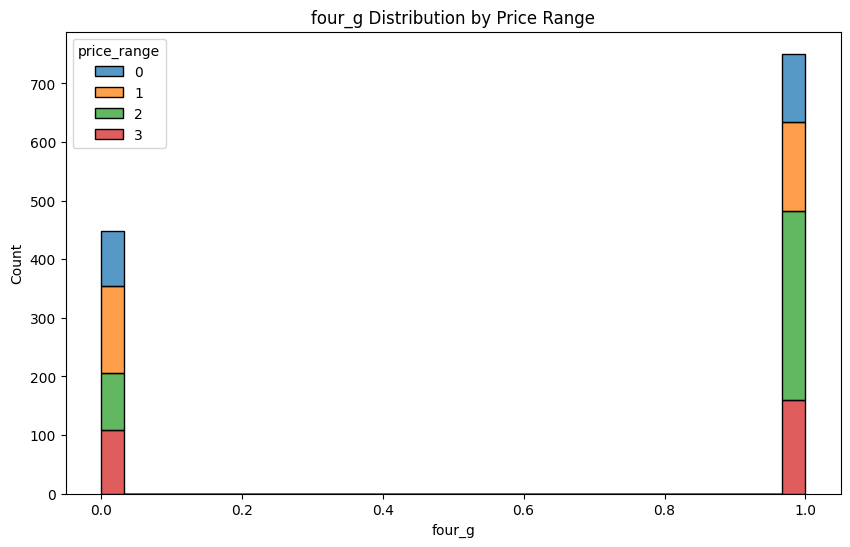

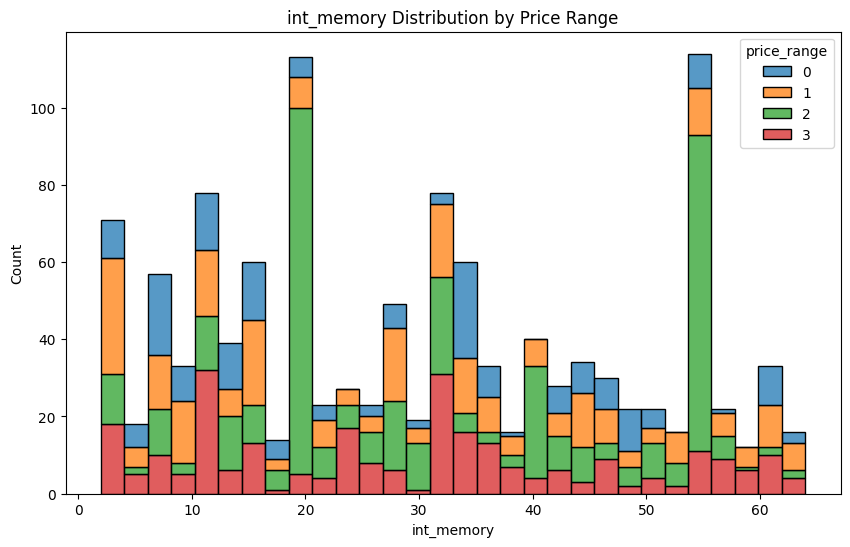

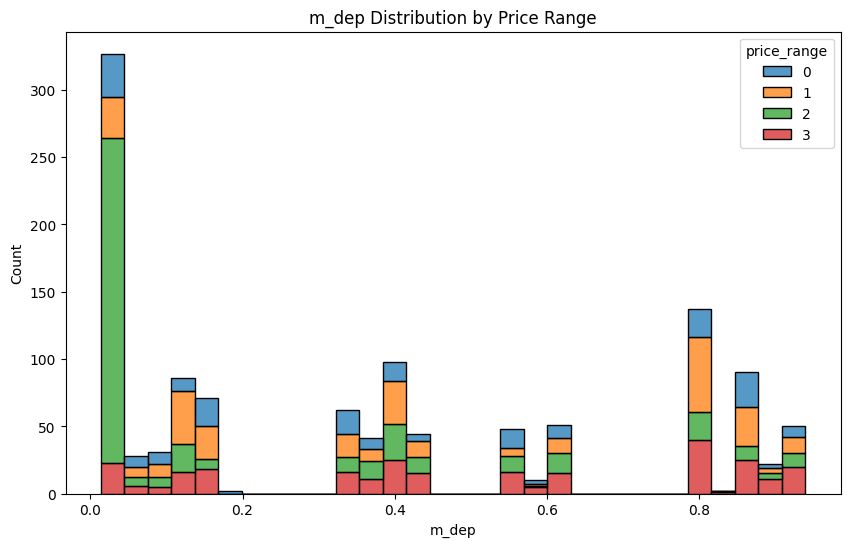

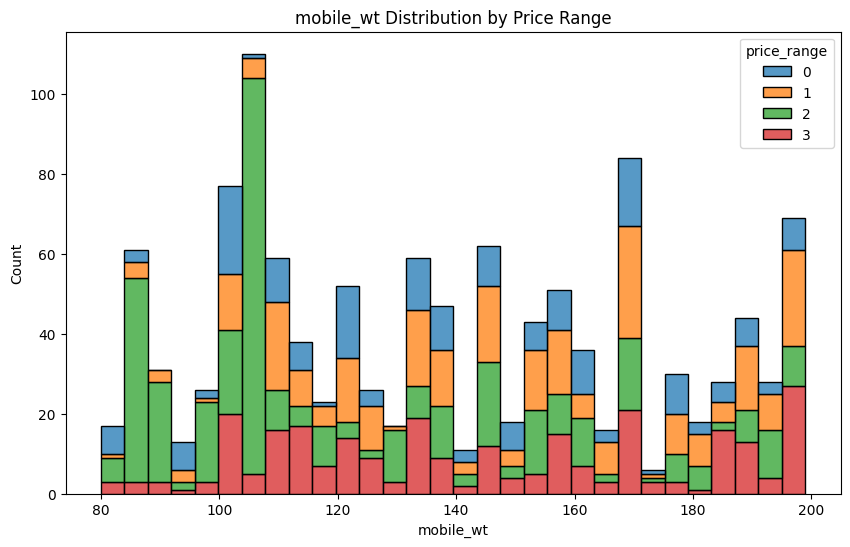

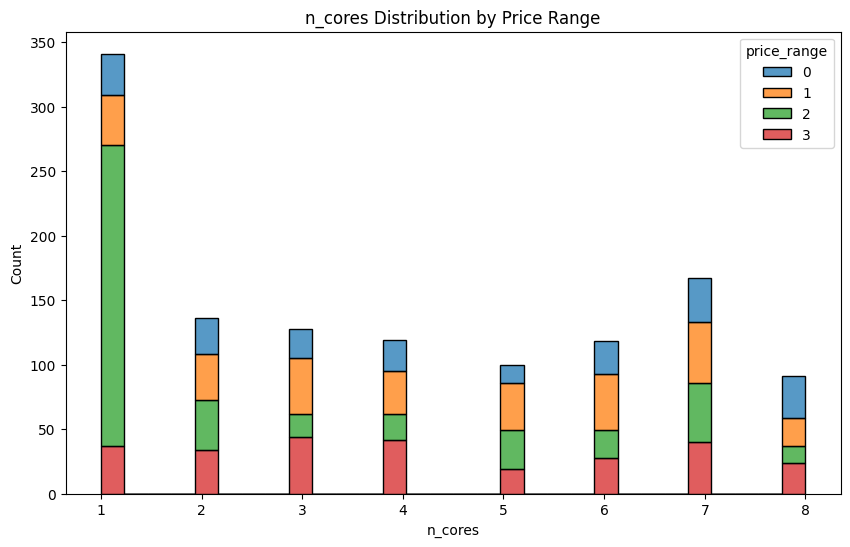

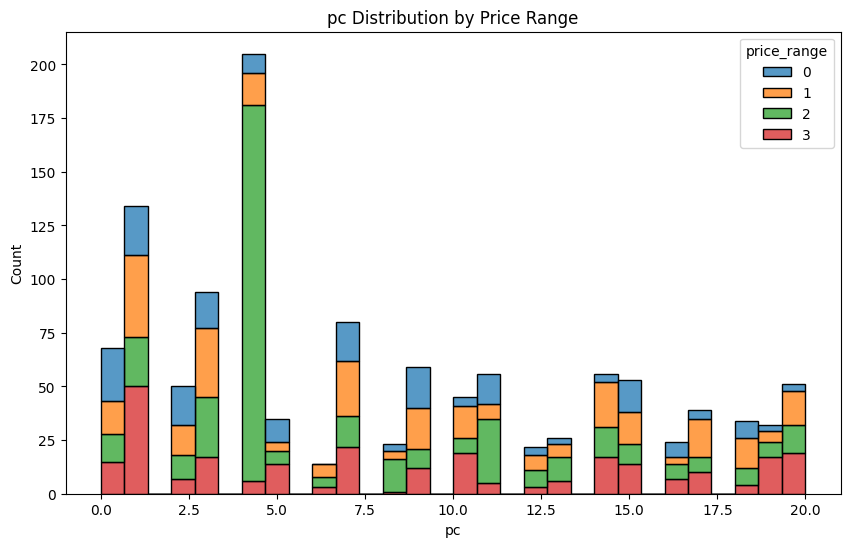

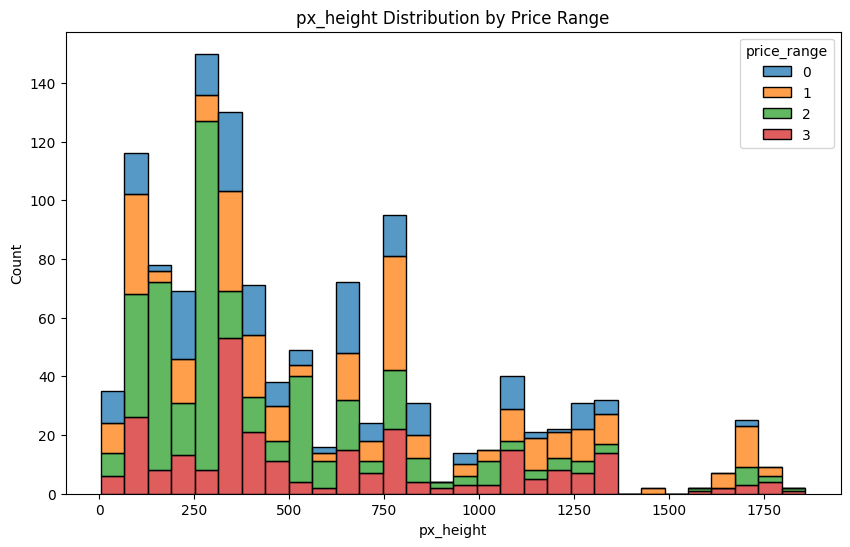

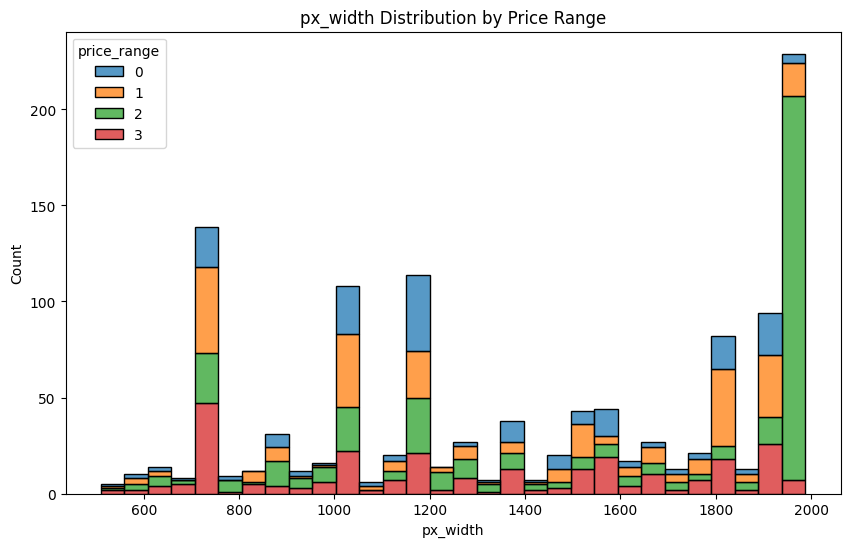

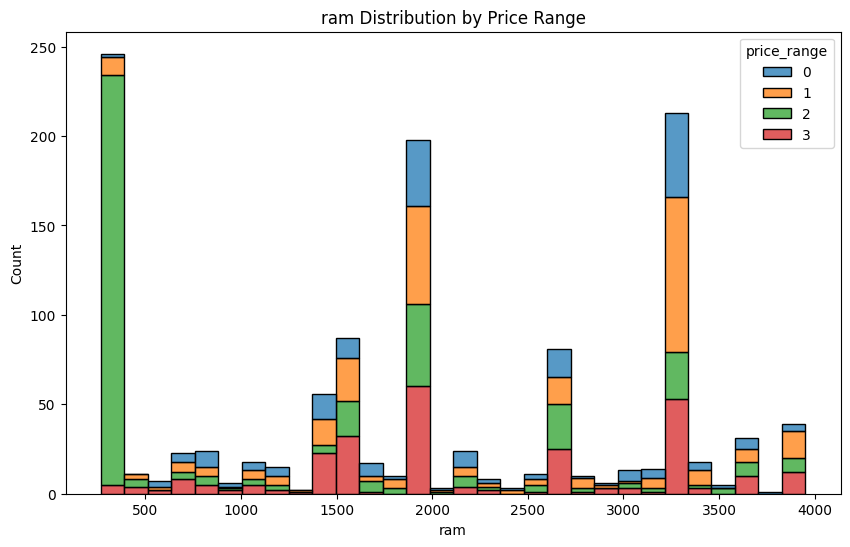

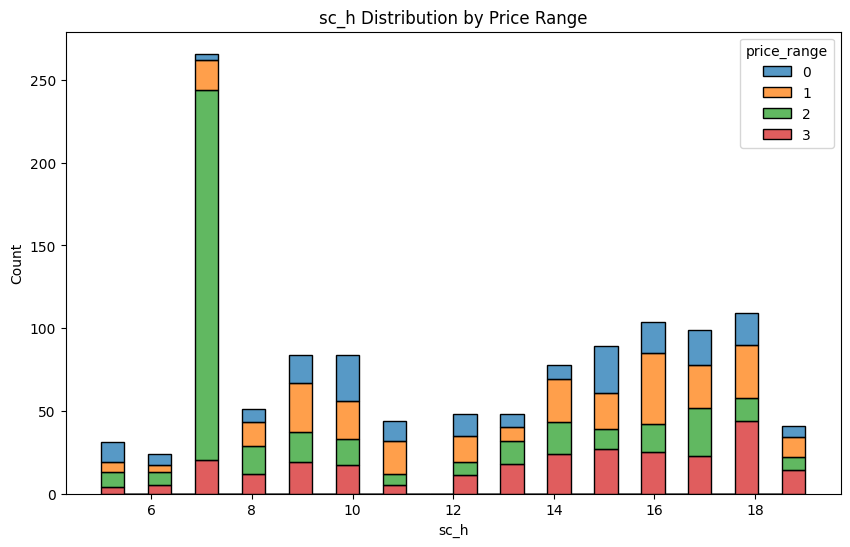

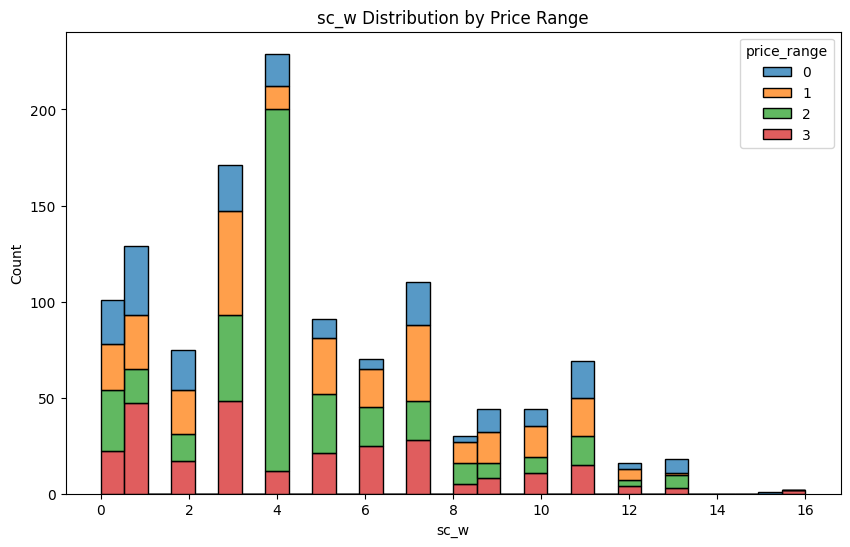

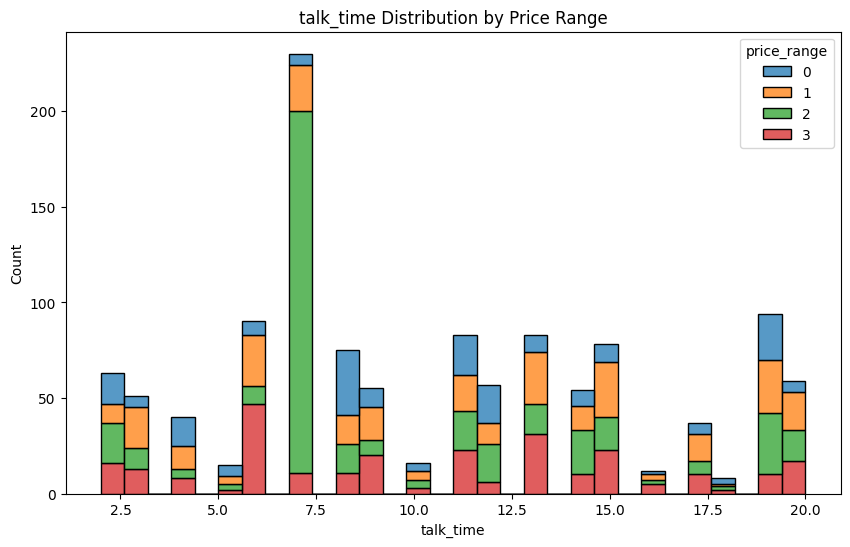

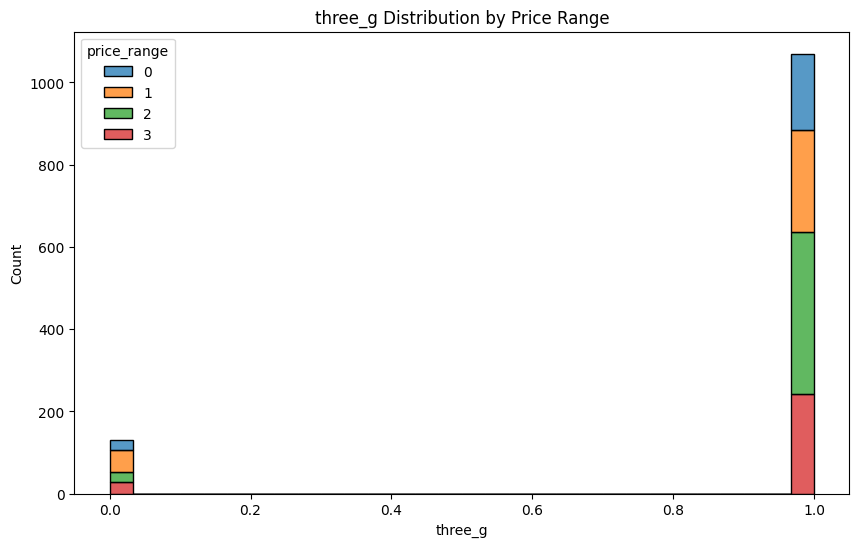

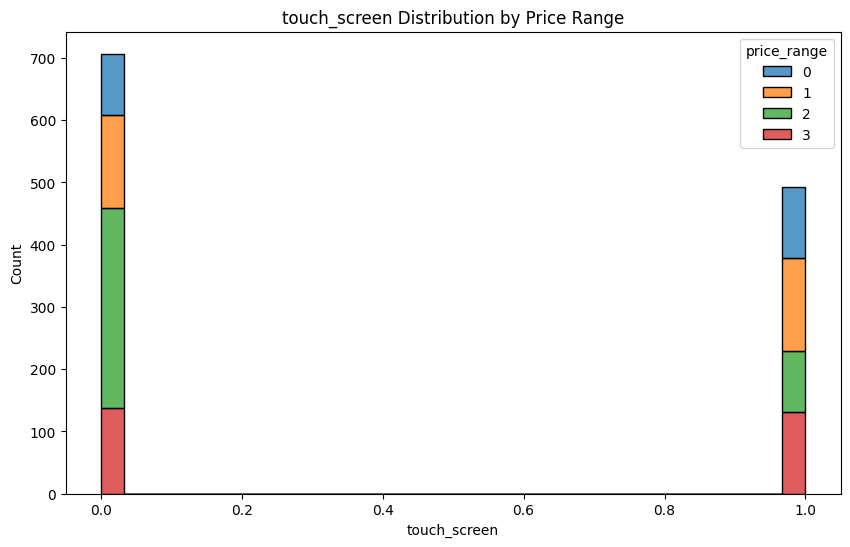

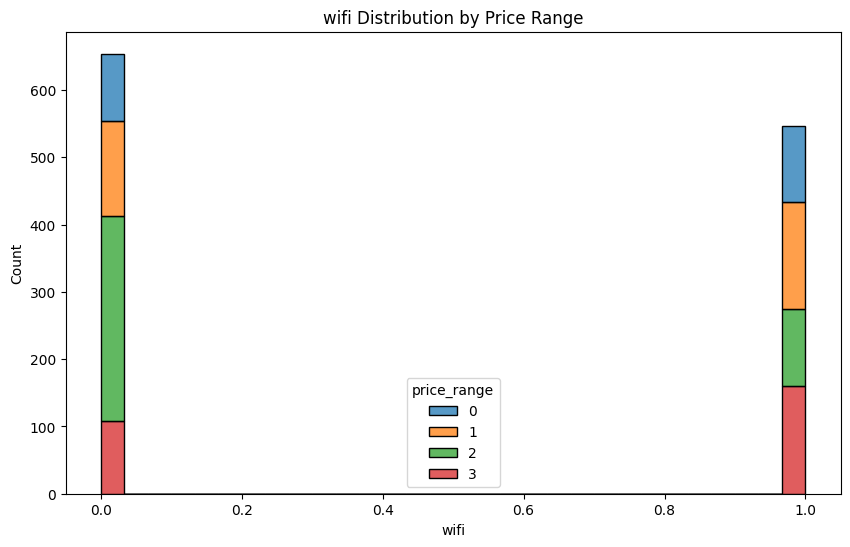

In [3]:
# 特徴量とprice_rangeの関係をヒストグラムで可視化
for column in train_df.columns[:-1]:  # 最後の列（price_range）を除外
    plt.figure(figsize=(10, 6))
    sns.histplot(data=train_df, x=column, hue='price_range', multiple="stack", palette="tab10", bins=30)
    plt.title(f'{column} Distribution by Price Range')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

In [4]:
from sklearn.model_selection import train_test_split
# 特徴量（Features）とターゲット（Target）の分離
X = train_df.drop(['price_range','id'], axis=1)
y = train_df['price_range']

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=6)

## 7. XGBoost
特徴:

- 勾配ブースティングアルゴリズムの実装。
- 高い精度と高速な学習が特徴。
- 過学習を防ぐための多くの正則化手段がある。<br>

適用シナリオ:

- 大規模で複雑なデータセット。
- コンペティションなどで高い精度が要求される場合。
- 訓練時間が比較的重要でない場合（ただし、効率的な実装なので比較的高速）。

In [5]:
import xgboost as xgb
from sklearn.metrics import classification_report, f1_score

# XGBoostのモデル構築と訓練
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

# 予測と評価
y_pred = xgb_model.predict(X_test)
f1_macro = f1_score(y_test, y_pred, average='macro')
print("XGBoost")
print(f'F1 Macro Score: {f1_macro:.4f}')
print(classification_report(y_test, y_pred))

XGBoost
F1 Macro Score: 0.3333
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         2
           2       0.67      0.67      0.67         6
           3       0.00      0.00      0.00         3

    accuracy                           0.50        12
   macro avg       0.29      0.42      0.33        12
weighted avg       0.42      0.50      0.44        12



c:\AIコンペ\携帯電話価格帯分類\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\AIコンペ\携帯電話価格帯分類\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\AIコンペ\携帯電話価格帯分類\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [6]:
test_predict = xgb_model.predict(test_df.drop("id",axis=1))
test_predict

array([3, 0, 3, 0, 2, 3, 0, 2, 1, 2, 1, 2, 3, 1, 3, 1, 1, 2, 3, 2, 1, 1,
       2, 3, 1, 1, 3, 1, 3, 2, 0, 1, 1, 2, 1, 2, 0, 0, 0, 0, 0, 3, 1, 0,
       1, 2, 3, 0, 2, 2, 2, 2, 1, 1, 3, 1, 2, 1, 3, 2, 2, 0, 2, 1, 2, 2,
       2, 2, 1, 2, 0, 3, 2, 2, 0, 1, 0, 1, 2, 2, 1, 1, 0, 2, 2, 3, 3, 1,
       1, 0, 3, 2, 1, 3, 1, 2, 3, 3, 2, 2, 0, 1, 1, 2, 2, 0, 3, 2, 2, 1,
       2, 2, 2, 1, 1, 3, 3, 1, 1, 1, 1, 3, 2, 1, 3, 2, 2, 2, 0, 2, 3, 0,
       1, 2, 3, 3, 0, 2, 1, 3, 2, 3, 2, 3, 2, 1, 3, 1, 2, 0, 2, 1, 2, 2,
       2, 1, 2, 2, 1, 3, 2, 0, 2, 3, 2, 3, 1, 1, 1, 1, 2, 3, 0, 3, 2, 1,
       2, 1, 2, 1, 2, 2, 0, 0, 2, 2, 1, 3, 2, 2, 3, 3, 1, 1, 1, 0, 1, 1,
       1, 0, 3, 2, 1, 2, 2, 3, 2, 1, 1, 0, 1, 1, 1, 0, 1, 2, 2, 2, 1, 1,
       2, 3, 1, 1, 1, 1, 0, 2, 1, 1, 2, 1, 1, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 3, 0, 0, 2, 1, 3, 0, 3, 2, 1, 3, 2, 0, 2, 3, 0, 2, 2, 3, 2,
       1, 1, 2, 3, 1, 2, 1, 2, 2, 2, 0, 0, 2, 1, 2, 1, 1, 2, 0, 3, 2, 0,
       2, 3, 0, 3, 2, 2, 1, 3, 1, 2, 2, 1, 2, 2, 0,

In [7]:
y_pred = xgb_model.predict(X_train)
f1_macro = f1_score(y_train, y_pred, average='macro')
print(f'f1_macro: {f1_macro:.4f}')

f1_macro: 1.0000


In [8]:
#sample_submissionの読み込み
import csv

# sample_submissionファイルのパスと名前
sample_filename = "../data/sample_submission.csv"
#提出データのパスと名前
submit_filename = "../submit/submit5.csv"

submit_data = []
# CSVファイルを読み込む
with open(sample_filename, 'r', encoding='utf-8') as file:
    reader = csv.reader(file)
    # 各行を処理する
    i = 0
    for row in reader:
        row[1] = test_predict[i]
        submit_data.append(row)
        i += 1


# 書き換えたデータをCSVファイルに書き込む
with open(submit_filename, 'w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    for row in submit_data:
        writer.writerow(row)
